# San Francisco crime analysis during summer months
## Objective

Based on criminal incident data from San Francisco city given analysis is an attempt to answer following questions:
* How how do incidents vary month to month in the Summer 2014 dataset?
* How do incidents vary by time of day? Which incidents are most common in the evening?
* How do incidents vary by neighborhood?

## Results
* During summer months a number of LARCENY/THEFT offences are constantly increasing with a peak around mid of August. Also number VEHICLE THEFT crimes have a slight increase around end on June. Otherwise number of other offences have more or less even distribution over summer months
* Number of all types of crimes tends to have a minimum around 5am. Most frequent crime in the evening is LARCENY/THEFT with a peak around 6pm. Also ASSAULTs and VEHICLE THEFTs are increasing overnight with peaks around midnight
* Downtown of San Francisco has the biggest number of crimes during the summer months. Most frequent crime category in downtown is LARCENY/THEFT

## Details and visualizations
### Data preparation
Before plotting the data few data preparation and preliminary analysis steps has to be performed.

At first, let's read original CSV file and reduce number of columns to those that are used in this particular analysis:

In [51]:
# Ignore warnings
options(warn=-1)

# Read original CSV file
sf_raw <- read.csv("/Users/philip/projects/datasci_course_materials/assignment6/sanfrancisco_incidents_summer_2014.csv")
# Import "dplyr" for convenient relational algebra operations over dataframes 
library("dplyr")
# Reduce number of columns used for crime analysis 
sf_crimes <- select(sf_raw, Category, Date, Time, X, Y)

Now, let's leave categories with the most frequent offences and remove all others. Here we use 1000 as a threshold for total number crimes in a category. 

In [52]:
# Analyse total number of offences in each category 
categories <- table(sf_crimes$Category)
# Remove any categories with total number of crimes less than 1000, so we look only at the most frequent offences
significant_categories <- names(categories[-which(categories  < 1000)]) 
sf_significant_crimes <- droplevels(sf_crimes[sf_crimes$Category %in% significant_categories, ])
table(sf_significant_crimes$Category)


       ASSAULT  DRUG/NARCOTIC  LARCENY/THEFT MISSING PERSON   NON-CRIMINAL 
          2882           1345           9466           1266           3023 
OTHER OFFENSES SUSPICIOUS OCC  VEHICLE THEFT       WARRANTS 
          3567           1300           1966           1782 

Also, let's convert date and time into appropriate format

In [53]:
# Apply data conversions to original dataset
util.convert <- function(df) {
  df$Date <- as.Date(df$Date, '%m/%d/%Y') 
  df$Time <- as.POSIXct(df$Time, format = "%H:%M")
  df$Hour <- as.numeric(format(df$Time, format="%H"))
  return (df)
}

sf_significant_crimes <- util.convert(sf_significant_crimes)

### Data visualization
#### In order to answer the first question, lets have a look at crime distribution over the summer months

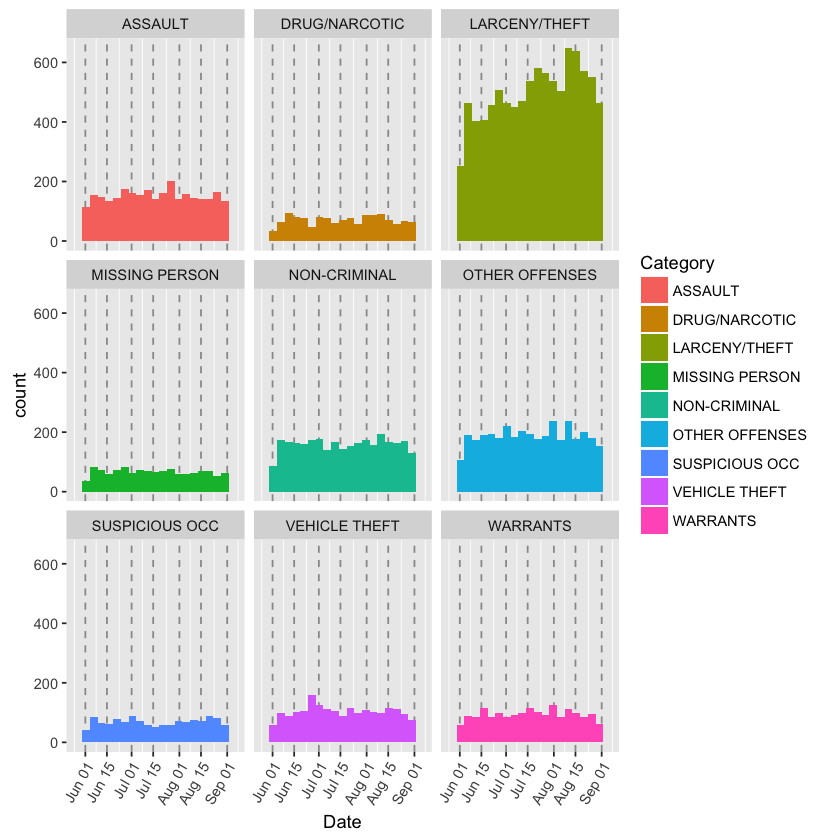

In [54]:
# Plot data distrubution over summber months
library("ggplot2")
qplot(Date, data = sf_significant_crimes, geom = "histogram", fill = Category, binwidth = 5) +  facet_wrap( ~ Category) + theme(axis.text.x = element_text(angle=60, hjust=1),
                                                                           panel.grid.major.y = element_blank(),
                                                                           panel.grid.minor.y = element_blank(),
                                                                           panel.grid.major.x = element_line(colour="grey60", linetype="dashed"))

By looking at graphs above, we can make a conclusion that <i>during summer months number of LARCENY/THEFT offences are constantly increasing with a peak around mid of August. Also number VEHICLE THEFT crimes have a slight increase around end on June, otherwise number of other offences have more or less even distribution over sumer months</i>.

#### To answer the second question, lets look at distribution of an average number of crimes during the day

Now we're going to group records by Hour of the Day and Category for answering the second question:

In [55]:
# Group data by hour and gategory
sf_grp_hour_cat <- group_by(sf_significant_crimes, Hour, Category)
sf_grp_hour_cat <- summarise(sf_grp_hour_cat, Count = n())

and visualize resulting data frame

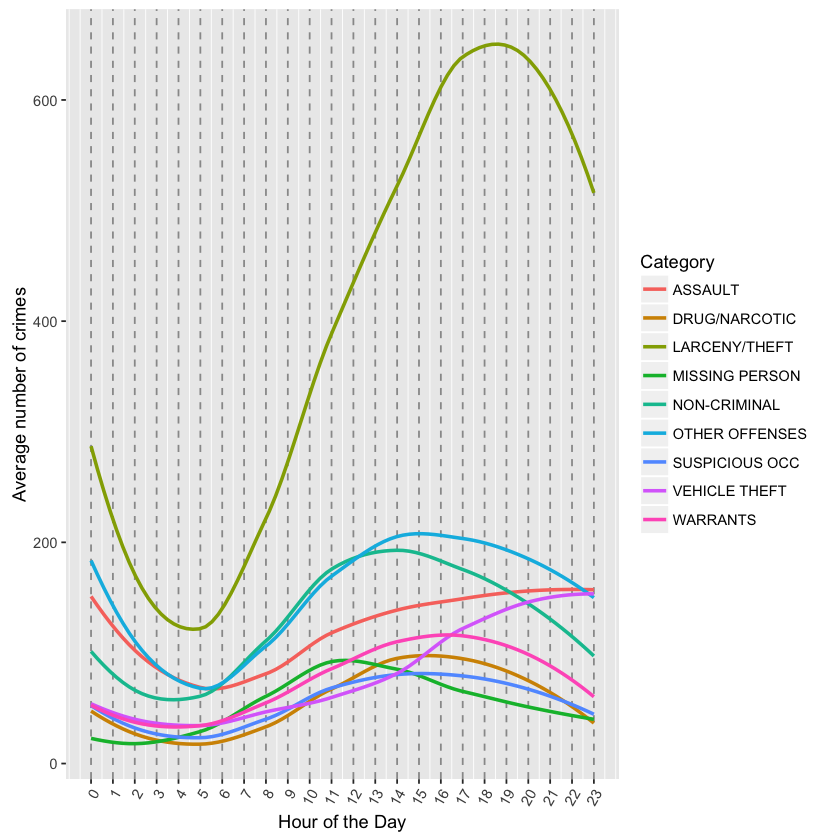

In [60]:
qplot(Hour, Count, data = sf_grp_hour_cat, geom = "smooth", color = Category, se = FALSE) + 
  scale_x_continuous(breaks = seq(0, 23, by = 1), ) +
  labs(x = "Hour of the Day", y = "Average number of crimes") +
  theme(axis.text.x = element_text(angle=60, hjust=1),
       panel.grid.major.y = element_blank(),
       panel.grid.minor.y = element_blank(),
       panel.grid.major.x = element_line(colour="grey60", linetype="dashed"))


Apparently, as we can see <i>number of all types of crimes tend to have a minimum around 5am. Most frequent crime in the evening is LARCENY/THEFT with a peak around 6pm</i>. Also <i>ASSAULTs and VEHICLE THEFTs are increasing ovenight with peaks around midnight</i>.   

#### Finally, answering third question requires exporting San Francisco city map ('ggmap' package is used) and plotting heat map over it  
First, let's group data by Geo-coordinates and Category:

In [57]:
# Group data by coordinates and Category
sf_grp_coord_cat <- group_by(sf_significant_crimes, X, Y, Category)
sf_grp_coord_cat <- summarise(sf_grp_coord_cat, Count = n())

Second, import SF city map from Google:

In [58]:
library(ggmap)

sf_map <- get_map(c(lon = -122.4056, lat = 37.73832), zoom=12, maptype = "roadmap", source = "google")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=37.73832,-122.4056&zoom=12&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false


Finally, plot crime heatmap diagram considering mapping Category to Color attribute and Number of Crimes to Alpha channel:

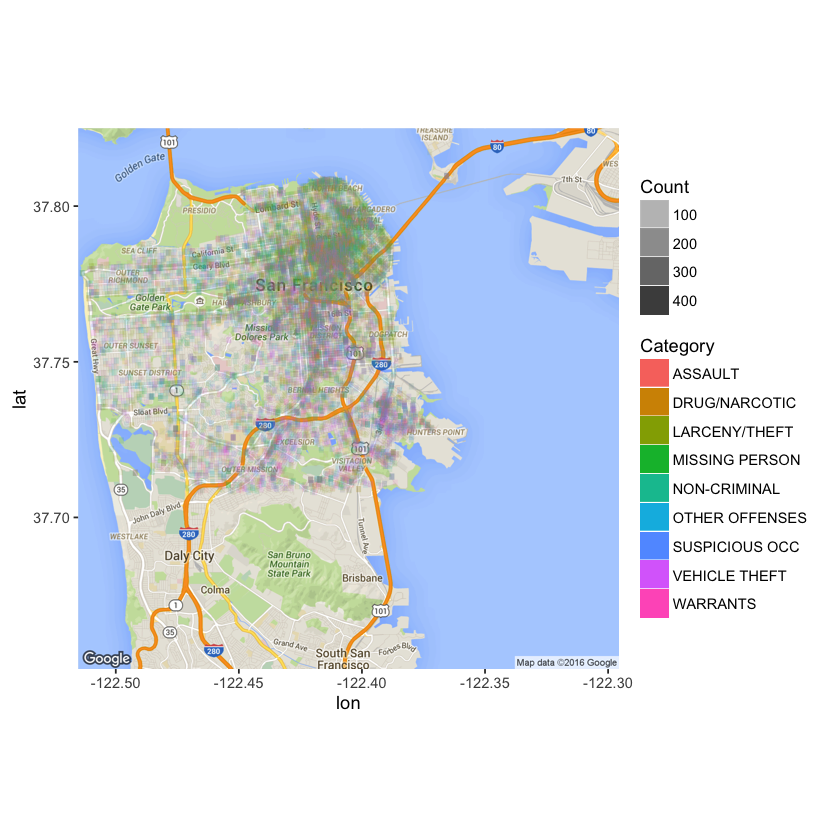

In [59]:
ggmap(sf_map) + geom_tile(
  data = sf_grp_coord_cat, aes(x = X, y = Y, alpha=Count, fill = Category, width = 0.002, height = 0.002))


As the one can expect, downtown of San Francisco has the biggest number of crimes during the summer months. Most frequent crime category in downtown is LARCENY/THEFT